<a href="https://colab.research.google.com/github/Ultan-Kearns/LYIT-Machine-Learning-Project/blob/main/CA3Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading files and importing libraries

In [35]:
#import libraries
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib 
import matplotlib.pyplot as plt
from scipy import stats

from google.colab import files
import io

uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['wdbcwh.csv']), header = 0)

Saving wdbcwh.csv to wdbcwh (1).csv


# Prepping and analyzing the data
In this section we prep and analyze the data we do this by dividing the data into two groups training and testing.  We will train the models with the training data so that we can predict the values within the testing dataset.  We do this because we want to avoid overfitting the model which will yield great results on our trainingset but will be of no practical use

In [114]:
# Show dataset
# split data into training and test datasets
# will implement the sklearn method here instead of manually splitting just need to ensure is 50/50 before linear model
trainingSet = df[0:284]
testSet = df[285:570]
xDiagnosis = trainingSet['Diagnosis']
yDiagnnosis = testSet['Diagnosis']
# Drop ID from the dataframe, it is not useful for our purposes except for identifying unique files
trainingSet = trainingSet.drop(['ID'],axis=1)
testSet = testSet.drop(['ID'],axis=1)
X = trainingSet
y = testSet
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [115]:
print('X_train ',X_train)
print('y_train ',y_train)
print('X_test ',X_test)
print('y_test ',y_test)

X_train      Diagnosis  Mean_Radius  ...  Worst_Symmetry  Worst_Fractal_Dimension
268         B       12.870  ...          0.3604                  0.07062
25          M       17.140  ...          0.4066                  0.10590
86          M       14.480  ...          0.3020                  0.06846
144         B       10.750  ...          0.2300                  0.06769
137         B       11.430  ...          0.2676                  0.06765
..        ...          ...  ...             ...                      ...
188         B       11.810  ...          0.3200                  0.06576
71          B        8.888  ...          0.2254                  0.10840
106         B       11.640  ...          0.2806                  0.09097
270         B       14.290  ...          0.2458                  0.06120
102         B       12.180  ...          0.2694                  0.06878

[227 rows x 31 columns]
y_train      Diagnosis  Mean_Radius  ...  Worst_Symmetry  Worst_Fractal_Dimension
553     

In [116]:
# print test sets shape will be same as training sets shape
print('X_test set shape: ',X_test.shape)
print('y_test set shape: ',y_test.shape)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)

X_test set shape:  (57, 31)
y_test set shape:  (57, 31)
X_train shape:  (227, 31)
y_train shape:  (227, 31)


In [117]:
# Replace malignant with 1 and benign with 0
trainingSet['Diagnosis'] = trainingSet['Diagnosis'].replace({'M':1,'B':0})
testSet['Diagnosis'] = testSet['Diagnosis'].replace({'M':1,'B':0})
X_train['Diagnosis'] = X_train['Diagnosis'].replace({'M':1,'B':0})
y_train['Diagnosis'] = y_train['Diagnosis'].replace({'M':1,'B':0})
X_test['Diagnosis'] = X_test['Diagnosis'].replace({'M':1,'B':0})
y_test['Diagnosis'] = y_test['Diagnosis'].replace({'M':1,'B':0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

## Show standard deviation of diagnose between sets

Here we are showing both the standard deviation and variance of the sets, these are good methods for detecting outliers in our set, as we can see both sets have a somewhat high level of standard deviation.  We may try dropping columns from our dataframe to try and reduce this.

In [118]:
print('Standard deviation of diagnosis values in x training set ',X_train['Diagnosis'].std())
print('Variance of diagnosis values in x training set: ', X_train['Diagnosis'].var())
print('Standard deviation of diagnosis values in y training set ',y_train['Diagnosis'].std())
print('Variance of diagnosis values in y training set: ', y_train['Diagnosis'].var())

Standard deviation of diagnosis values in x training set  0.5010612105831019
Variance of diagnosis values in x training set:  0.2510623367510036
Standard deviation of diagnosis values in y training set  0.43204095812490545
Variance of diagnosis values in y training set:  0.1866593894974863


In [119]:
print('Standard deviation of diagnosis values in x testing set ',X_test['Diagnosis'].std())
print('Variance of diagnosis values in x testing set: ', X_test['Diagnosis'].var())
print('Standard deviation of diagnosis values in y testing set ',y_test['Diagnosis'].std())
print('Variance of diagnosis values in y testing set: ', y_test['Diagnosis'].var())

Standard deviation of diagnosis values in x testing set  0.5037453706946007
Variance of diagnosis values in x testing set:  0.2537593984962407
Standard deviation of diagnosis values in y testing set  0.3981473386299919
Variance of diagnosis values in y testing set:  0.15852130325814545


## Show correlation
Here we are showing the correlation between each feature within the dataset.  Correlation is determined by analyzing the values of different features and comparing them with each other.  A 1 means that the values of the feature match exactly a value of -1 means that the values have very little in common.  It is important that we use a wide variety of features which have low correlation as it will yield more accurate results.  I have shown correlations of features for both the X and Y triaining and test sets

In [120]:
# Show correlation of our training set
X_train.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.693758,0.511021,0.708810,0.653786,0.301733,0.556527,0.632953,0.732928,0.299713,-0.014854,0.491945,-0.034571,0.487418,0.480553,-0.073365,0.263861,0.177946,0.335631,0.004495,0.038775,0.749848,0.525213,0.764774,0.690703,0.394651,0.590264,0.658016,0.786966,0.429733,0.343161
Mean_Radius,0.693758,1.000000,0.433461,0.997198,0.986761,0.071047,0.433630,0.614173,0.785283,0.127975,-0.332327,0.675121,-0.039090,0.665570,0.742436,-0.141809,0.166274,0.139875,0.297082,-0.011977,-0.051237,0.958896,0.368525,0.954834,0.932722,0.012173,0.337981,0.467685,0.679061,0.123638,-0.036699
Mean_Texture,0.511021,0.433461,1.000000,0.437655,0.408447,-0.029701,0.277583,0.322897,0.343614,0.046889,-0.105696,0.241561,0.230854,0.247437,0.248040,-0.098412,0.181341,0.104921,0.148049,-0.082100,0.007953,0.480030,0.910564,0.480612,0.459114,0.109073,0.357602,0.367195,0.390183,0.131208,0.157238
Mean_Perimeter,0.708810,0.997198,0.437655,1.000000,0.984175,0.115947,0.494583,0.660722,0.820910,0.170267,-0.274819,0.690347,-0.022423,0.688272,0.752916,-0.119185,0.215677,0.173546,0.330679,0.016644,-0.012583,0.958242,0.373534,0.960589,0.931123,0.048077,0.385185,0.508069,0.710712,0.152158,0.009838
Mean_Area,0.653786,0.986761,0.408447,0.984175,1.000000,0.076008,0.412019,0.611869,0.773705,0.111369,-0.310845,0.722079,-0.009676,0.710275,0.801842,-0.086924,0.164735,0.151683,0.283052,0.019791,-0.028384,0.943214,0.338741,0.938112,0.940566,0.011624,0.298434,0.437853,0.641175,0.087046,-0.050941
Mean_Smoothness,0.301733,0.071047,-0.029701,0.115947,0.076008,1.000000,0.647243,0.521424,0.536178,0.556819,0.605343,0.267620,0.068183,0.262495,0.210559,0.333399,0.364050,0.227455,0.299414,0.241812,0.296854,0.115291,0.012208,0.149853,0.100627,0.760970,0.477070,0.426794,0.459960,0.382337,0.513519
Mean_Compactness,0.556527,0.433630,0.277583,0.494583,0.412019,0.647243,1.000000,0.875477,0.823581,0.640185,0.602100,0.463933,0.124090,0.510905,0.413112,0.164443,0.732341,0.506400,0.574104,0.320575,0.490930,0.470281,0.275480,0.531285,0.431001,0.521084,0.843658,0.797446,0.786929,0.523381,0.674103
Mean_Concavity,0.632953,0.614173,0.322897,0.660722,0.611869,0.521424,0.875477,1.000000,0.907934,0.537991,0.405416,0.624978,0.161890,0.628607,0.596514,0.180237,0.661738,0.672290,0.631846,0.280920,0.501628,0.621658,0.298221,0.663650,0.596124,0.406989,0.700001,0.853279,0.810565,0.398047,0.509028
Mean_Concave_Points,0.732928,0.785283,0.343614,0.820910,0.773705,0.536178,0.823581,0.907934,1.000000,0.496174,0.203765,0.681440,0.058631,0.686504,0.674838,0.073333,0.477088,0.389202,0.542367,0.188097,0.262401,0.790940,0.310087,0.822365,0.758271,0.397013,0.636900,0.731047,0.884197,0.375193,0.360761
Mean_Symmetry,0.299713,0.127975,0.046889,0.170267,0.111369,0.556819,0.640185,0.537991,0.496174,1.000000,0.510108,0.279310,0.136493,0.281163,0.193448,0.076437,0.417372,0.322562,0.337653,0.460460,0.333946,0.169718,0.088826,0.208533,0.138164,0.406540,0.511316,0.479653,0.466041,0.707346,0.483788


In [121]:
y_train.corr(method='pearson')


,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.769426,0.376897,0.780028,0.762977,0.303262,0.576301,0.766428,0.811827,0.294570,-0.077179,0.621976,0.053931,0.607494,0.570318,-0.056006,0.260123,0.376220,0.458505,-0.026803,0.087628,0.787703,0.399229,0.794263,0.750885,0.309202,0.515966,0.666026,0.777708,0.291892,0.182323
Mean_Radius,0.769426,1.000000,0.247432,0.998307,0.986882,0.160410,0.506367,0.745034,0.851729,0.135347,-0.332104,0.704339,-0.117412,0.692857,0.725582,-0.273288,0.171452,0.298661,0.418897,-0.185329,-0.078620,0.982401,0.225798,0.976668,0.946547,0.088555,0.391763,0.569543,0.769556,0.135745,-0.058308
Mean_Texture,0.376897,0.247432,1.000000,0.253828,0.254551,-0.090476,0.154134,0.296517,0.249290,0.064635,-0.138033,0.293785,0.506139,0.302250,0.257163,0.101312,0.189777,0.232772,0.202468,0.130970,0.046741,0.256234,0.909359,0.267191,0.251510,-0.038895,0.176066,0.278540,0.231786,0.032049,-0.018799
Mean_Perimeter,0.780028,0.998307,0.253828,1.000000,0.987389,0.190506,0.551157,0.778628,0.874398,0.163337,-0.289707,0.714203,-0.114698,0.709171,0.733756,-0.256072,0.211897,0.334632,0.447082,-0.175673,-0.040819,0.982407,0.230741,0.981632,0.948469,0.115844,0.431836,0.604541,0.793788,0.152647,-0.015127
Mean_Area,0.762977,0.986882,0.254551,0.987389,1.000000,0.179154,0.511255,0.759592,0.862145,0.155015,-0.299015,0.775189,-0.087386,0.762823,0.806506,-0.215424,0.182717,0.301962,0.420575,-0.151645,-0.051820,0.984155,0.228249,0.980291,0.977754,0.108186,0.381814,0.558155,0.759718,0.130532,-0.050564
Mean_Smoothness,0.303262,0.160410,-0.090476,0.190506,0.179154,1.000000,0.649561,0.440800,0.488078,0.527650,0.621035,0.274300,0.045979,0.271484,0.211150,0.383059,0.216036,0.220241,0.391933,0.101031,0.306616,0.192478,-0.047641,0.214094,0.201189,0.841187,0.397748,0.351691,0.455283,0.290972,0.481607
Mean_Compactness,0.576301,0.506367,0.154134,0.551157,0.511255,0.649561,1.000000,0.858132,0.798175,0.529606,0.547435,0.466018,-0.048315,0.534185,0.423827,0.146791,0.695145,0.669460,0.673662,0.017049,0.555668,0.523182,0.143703,0.581607,0.508460,0.569824,0.850597,0.809874,0.809001,0.357438,0.682662
Mean_Concavity,0.766428,0.745034,0.296517,0.778628,0.759592,0.440800,0.858132,1.000000,0.935927,0.394747,0.197866,0.647307,-0.003152,0.705295,0.633714,0.023397,0.601214,0.724647,0.696408,-0.039256,0.391983,0.753052,0.277756,0.799316,0.745782,0.382617,0.742470,0.886121,0.894082,0.264444,0.434573
Mean_Concave_Points,0.811827,0.851729,0.249290,0.874398,0.862145,0.488078,0.798175,0.935927,1.000000,0.378386,0.092366,0.714941,-0.010946,0.734980,0.683564,-0.003269,0.429892,0.532195,0.656608,-0.050845,0.234632,0.858016,0.242153,0.881926,0.841757,0.396766,0.613997,0.750014,0.918246,0.260988,0.284408
Mean_Symmetry,0.294570,0.135347,0.064635,0.163337,0.155015,0.527650,0.529606,0.394747,0.378386,1.000000,0.430266,0.280424,0.070292,0.299660,0.200584,0.317058,0.363250,0.309148,0.403208,0.366096,0.325563,0.158575,0.042268,0.186778,0.166976,0.421455,0.370067,0.319148,0.351844,0.650411,0.363557


In [122]:
X_test.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.743433,0.387245,0.748025,0.720636,0.369311,0.643135,0.596852,0.736906,0.296912,0.014154,0.551444,-0.086514,0.530631,0.619653,-0.226337,0.336234,0.120643,0.378600,-0.195639,0.120627,0.797898,0.457063,0.786544,0.771477,0.476418,0.586014,0.519209,0.780712,0.370579,0.319176
Mean_Radius,0.743433,1.000000,0.371860,0.998152,0.991646,0.179677,0.634200,0.659557,0.830032,0.167012,-0.270959,0.690668,-0.054129,0.706771,0.790055,-0.282086,0.358460,0.114445,0.459109,-0.253388,0.009220,0.966632,0.328300,0.966106,0.949582,0.214635,0.470323,0.455518,0.784246,0.109858,0.054505
Mean_Texture,0.387245,0.371860,1.000000,0.381246,0.387725,0.076494,0.345270,0.325782,0.348203,0.105108,0.063788,0.316014,0.445125,0.323033,0.329581,-0.070590,0.237637,0.096884,0.134326,-0.046632,0.153619,0.383148,0.909757,0.392223,0.387017,0.186790,0.320814,0.274056,0.299801,0.169053,0.216161
Mean_Perimeter,0.748025,0.998152,0.381246,1.000000,0.993112,0.214939,0.675665,0.696829,0.856105,0.197780,-0.220788,0.704393,-0.042675,0.725643,0.802512,-0.263255,0.400834,0.145265,0.486131,-0.224759,0.053224,0.966155,0.337444,0.970737,0.951461,0.241237,0.509085,0.491471,0.806704,0.140139,0.094526
Mean_Area,0.720636,0.991646,0.387725,0.993112,1.000000,0.195437,0.648293,0.691961,0.843977,0.181675,-0.225390,0.709623,-0.018224,0.730459,0.809735,-0.228551,0.385274,0.152293,0.475644,-0.218776,0.051620,0.956762,0.331497,0.960400,0.954255,0.218585,0.465696,0.469720,0.774478,0.099398,0.063344
Mean_Smoothness,0.369311,0.179677,0.076494,0.214939,0.195437,1.000000,0.624030,0.575308,0.604762,0.635328,0.595868,0.358900,0.218563,0.338255,0.335262,0.423857,0.380575,0.263629,0.461519,0.271805,0.419759,0.239697,0.151112,0.259867,0.259812,0.799284,0.493870,0.461574,0.532687,0.503877,0.472370
Mean_Compactness,0.643135,0.634200,0.345270,0.675665,0.648293,0.624030,1.000000,0.904321,0.883541,0.557442,0.511925,0.639599,0.062661,0.686903,0.678027,0.010877,0.816872,0.492108,0.687958,0.209164,0.623588,0.659129,0.357472,0.707708,0.662515,0.564902,0.912437,0.814765,0.871012,0.588870,0.663341
Mean_Concavity,0.596852,0.659557,0.325782,0.696829,0.691961,0.575308,0.904321,1.000000,0.900300,0.489264,0.419001,0.630859,0.093934,0.677318,0.677568,0.063769,0.810834,0.683935,0.791610,0.172177,0.579080,0.665357,0.318312,0.710193,0.681318,0.518528,0.784438,0.894424,0.880411,0.478200,0.529343
Mean_Concave_Points,0.736906,0.830032,0.348203,0.856105,0.843977,0.604762,0.883541,0.900300,1.000000,0.463444,0.192983,0.740265,0.089574,0.763280,0.798841,0.045505,0.611273,0.349541,0.691896,0.006503,0.350266,0.833702,0.337570,0.861703,0.837653,0.541934,0.697731,0.689678,0.923717,0.361851,0.371479
Mean_Symmetry,0.296912,0.167012,0.105108,0.197780,0.181675,0.635328,0.557442,0.489264,0.463444,1.000000,0.449796,0.404387,0.231112,0.419755,0.359751,0.188150,0.498035,0.339435,0.513002,0.634715,0.451289,0.195032,0.090023,0.235301,0.211772,0.355135,0.420259,0.382499,0.413969,0.700155,0.285607


In [45]:
y_test.corr(method='pearson')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
Diagnosis,1.000000,0.795478,0.320698,0.806576,0.807647,0.558235,0.681725,0.818977,0.860249,0.347764,0.092164,0.706765,0.038154,0.706670,0.767509,0.035402,0.293405,0.397359,0.527447,0.013413,0.115651,0.835915,0.360343,0.837227,0.827264,0.539405,0.644477,0.751234,0.838544,0.388176,0.411559
Mean_Radius,0.795478,1.000000,0.194827,0.998737,0.989872,0.455657,0.634214,0.771739,0.884262,0.147482,-0.230564,0.647004,-0.173750,0.657209,0.774256,-0.264541,0.218806,0.274567,0.454973,-0.163486,-0.000247,0.978464,0.204555,0.973942,0.953422,0.345089,0.602431,0.670172,0.841016,0.271396,0.155051
Mean_Texture,0.320698,0.194827,1.000000,0.201448,0.201235,0.076836,0.236408,0.261361,0.219162,0.121661,0.084810,0.283292,0.482814,0.291590,0.254221,0.205721,0.225980,0.211808,0.205720,0.046134,0.201721,0.219231,0.905581,0.229765,0.211733,0.151413,0.245674,0.239990,0.203816,0.056208,0.219182
Mean_Perimeter,0.806576,0.998737,0.201448,1.000000,0.989559,0.479361,0.670310,0.798804,0.901984,0.175766,-0.189544,0.654747,-0.162732,0.668266,0.779008,-0.251316,0.254394,0.308250,0.480303,-0.136807,0.029085,0.979101,0.211755,0.977407,0.954815,0.364142,0.635022,0.699144,0.860159,0.296904,0.192764
Mean_Area,0.807647,0.989872,0.201235,0.989559,1.000000,0.451882,0.636388,0.790927,0.897520,0.169197,-0.195570,0.695069,-0.142870,0.705097,0.818742,-0.206353,0.225943,0.284166,0.454980,-0.134650,0.010080,0.983216,0.207768,0.979414,0.977622,0.345205,0.599012,0.670737,0.835205,0.278431,0.163609
Mean_Smoothness,0.558235,0.455657,0.076836,0.479361,0.451882,1.000000,0.714345,0.632900,0.673658,0.530683,0.413859,0.414543,0.066438,0.405241,0.430709,0.151398,0.206740,0.309249,0.440236,0.118934,0.081379,0.484376,0.168892,0.493348,0.469293,0.840047,0.547405,0.594188,0.673218,0.518060,0.463000
Mean_Compactness,0.681725,0.634214,0.236408,0.670310,0.636388,0.714345,1.000000,0.922277,0.853125,0.557840,0.526042,0.541361,0.045366,0.589546,0.570017,0.051506,0.696996,0.718695,0.702758,0.279618,0.447389,0.651493,0.248797,0.687957,0.639742,0.579321,0.913443,0.898631,0.857501,0.574043,0.710447
Mean_Concavity,0.818977,0.771739,0.261361,0.798804,0.790927,0.632900,0.922277,1.000000,0.947317,0.488295,0.336124,0.652483,0.045467,0.690080,0.710141,0.026923,0.607402,0.697123,0.695471,0.209558,0.344352,0.789580,0.285008,0.813021,0.790653,0.519222,0.863278,0.933472,0.906831,0.523504,0.584060
Mean_Concave_Points,0.860249,0.884262,0.219162,0.901984,0.897520,0.673658,0.853125,0.947317,1.000000,0.416139,0.151115,0.694257,-0.015307,0.708796,0.772055,-0.054608,0.418754,0.493847,0.615072,0.080393,0.193197,0.894213,0.259589,0.903942,0.889236,0.539941,0.768761,0.841189,0.943115,0.482934,0.436776
Mean_Symmetry,0.347764,0.147482,0.121661,0.175766,0.169197,0.530683,0.557840,0.488295,0.416139,1.000000,0.516437,0.287626,0.216441,0.303837,0.232473,0.261926,0.327478,0.384539,0.342256,0.385810,0.218595,0.191624,0.152482,0.215046,0.201716,0.453172,0.469165,0.464364,0.384487,0.749859,0.479226


# Training the linear regression model

Here we are using linear regression to train the model to predict the Symmetry severity of breast cancer based on the area severity in the trainingset as we can see here the model predicts an approximation of the Symmetry severity based on the area , it has an r squared value of 0.001  which tells us that the fit isn't great for the training set.  This model also has a mean squared error of ~6.4 which tells us that the model is fairly accurate when predicting values in the test set

r^2 value:  0.001587218878061569
mean_squared_error value:  6.4020382698225e-05
Prediction:  [[0.01961245]
 [0.01961254]
 [0.01961244]
 [0.01961249]
 [0.01961249]
 [0.01961243]
 [0.0196125 ]
 [0.01961246]
 [0.01961246]
 [0.0196125 ]
 [0.01961253]
 [0.01961254]
 [0.01961249]
 [0.0196125 ]
 [0.01961261]
 [0.01961253]
 [0.01961251]
 [0.01961245]
 [0.01961244]
 [0.01961257]
 [0.01961249]
 [0.01961258]
 [0.01961249]
 [0.0196125 ]
 [0.01961247]
 [0.01961248]
 [0.01961248]
 [0.01961249]
 [0.01961254]
 [0.01961249]
 [0.01961243]
 [0.01961247]
 [0.01961247]
 [0.01961246]
 [0.01961245]
 [0.01961254]
 [0.01961269]
 [0.01961248]
 [0.01961243]
 [0.01961249]
 [0.01961245]
 [0.01961253]
 [0.01961245]
 [0.01961249]
 [0.01961254]
 [0.01961247]
 [0.01961249]
 [0.01961248]
 [0.01961248]
 [0.0196125 ]
 [0.01961246]
 [0.01961249]
 [0.01961245]
 [0.01961246]
 [0.01961247]
 [0.01961249]
 [0.01961251]]


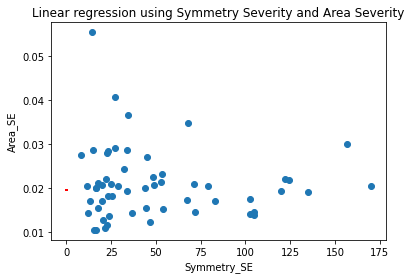

In [287]:
# Here we train a model to perform linear regression data set to predict the diagnosis

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt
# create the linear regression model by fitting training set to the test set
y_testArray = np.array(y_test['Symmetry_SE']).reshape(-1,1)
y_trainArray = np.array(y_train['Symmetry_SE']).reshape(-1,1)
X_trainArray = np.array(X_train['Area_SE']).reshape(-1,1)
X_testArray = np.array(X_test['Area_SE']).reshape(-1,1)

regression_model = LinearRegression().fit(X_trainArray, y_trainArray)
# Score the model and retrive r^2 value
rSquared = regression_model.score(X_trainArray, y_trainArray)
print('r^2 value: ', rSquared)
prediction = regression_model.predict(y_testArray)
print('mean_squared_error value: ', mean_squared_error(y_testArray, prediction))
print('Prediction: ', regression_model.predict(y_testArray))
plt.xlabel("Symmetry_SE")
plt.ylabel("Area_SE")
plt.title('Linear regression using Symmetry Severity and Area Severity')
plt.scatter(X_testArray,y_testArray)
plt.plot(y_testArray,prediction,c='r')

In [288]:
#0.03003 actual value line 1 of excel
print('predict line 1: ',regression_model.predict([[153.4]]))
# actual 0.026
print('predict line 570: ',regression_model.predict([[19.15]]))


predict line 1:  [[0.02050179]]
predict line 570:  [[0.0197234]]


Here we are performing more predictions on our test set this time using Concavity to predict the concave points serverity, we can also see the model has an r^2 value of 0.002 which is fairly low also

r^2 value:  0.002144988137728454
mean_squared_error value:  3.4075078404724365e-05
Prediction:  [[0.01102021]
 [0.01095701]
 [0.01100182]
 [0.01100109]
 [0.01098566]
 [0.01105033]
 [0.01103318]
 [0.01102932]
 [0.01098831]
 [0.01107805]
 [0.01103473]
 [0.01103813]
 [0.01100604]
 [0.011047  ]
 [0.01117652]
 [0.01104898]
 [0.0110447 ]
 [0.01098495]
 [0.01104225]
 [0.01115719]
 [0.01101653]
 [0.01105967]
 [0.01109532]
 [0.0111278 ]
 [0.01102442]
 [0.0110232 ]
 [0.0110362 ]
 [0.01108582]
 [0.01095701]
 [0.01105904]
 [0.01099723]
 [0.01104502]
 [0.01102962]
 [0.01107259]
 [0.01100045]
 [0.01101955]
 [0.01113786]
 [0.01101315]
 [0.01102405]
 [0.01105072]
 [0.01098386]
 [0.01098451]
 [0.0109952 ]
 [0.01112645]
 [0.01107631]
 [0.01105017]
 [0.01111869]
 [0.01106126]
 [0.01105175]
 [0.01104946]
 [0.01100054]
 [0.01107251]
 [0.01099804]
 [0.01105104]
 [0.01101629]
 [0.01106506]
 [0.01108883]]


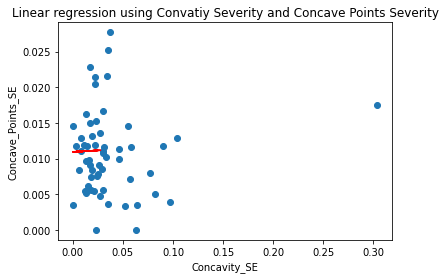

In [292]:
# create the linear regression model by fitting training set to the test set
y_testArray = np.array(y_test['Concave_Points_SE']).reshape(-1,1)
y_trainArray = np.array(y_train['Concave_Points_SE']).reshape(-1,1)
X_trainArray = np.array(X_train['Concavity_SE']).reshape(-1,1)
X_testArray = np.array(X_test['Concavity_SE']).reshape(-1,1)
# here we need to reshape the data using numpy so that the training data matches the testdata
regression_model = LinearRegression().fit(X_trainArray, y_trainArray)
prediction = regression_model.predict(y_testArray)
print('r^2 value: ', regression_model.score(X_trainArray, y_trainArray))
print('mean_squared_error value: ', mean_squared_error(y_testArray, prediction))
print('Prediction: ', regression_model.predict(y_testArray))
plt.xlabel("Concavity_SE")
plt.ylabel("Concave_Points_SE")
plt.title('Linear regression using Convatiy Severity and Concave Points Severity')
plt.scatter(X_testArray,y_testArray)
plt.plot(y_testArray,prediction,c='r')


In [247]:
#predicting compactness based on random sample
regression_model.predict([[0.0186]])

array([[0.01110435]])

# Examples of low and high correlation in our dataset

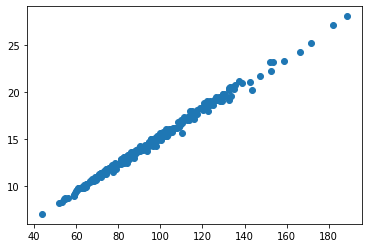

In [248]:
# Example of positive Linear correlation between radius and perimeter
# since these correlate highly we can remove one of them from set

plt.scatter(trainingSet['Mean_Perimeter'],trainingSet['Mean_Radius'])


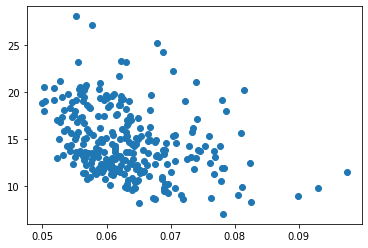

In [249]:
# example of low negative correlation
plt.scatter(trainingSet['Mean_Fractal_Dimension'],trainingSet['Mean_Radius'])


# KNN Predictions

Here we are using KNN to make predictions based on a number of features fed into the model.  As we can see it's score is 0.84 which isn't perfect but it's better to avoid overfitting the model so that it can adapt to new data

In [275]:
# K Nearest Neighbour

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
knnTrainSet = X_train.drop(['Diagnosis'],axis=1)
knnTestSet = X_test.drop(['Diagnosis'],axis=1)
knnYTestSet = y_test.drop(['Diagnosis'],axis=1)
knn.fit(knnTrainSet,y_train[['Diagnosis']])
print('Performance on X_test: ',knn.score(knnTrainSet,y_train['Diagnosis']))


Performance on X_test:  0.8193832599118943


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


In [276]:
testSet.shape


(284, 24)

In [278]:

# Make prediction on testSet
x_predictions = knn.predict(knnTestSet)
y_predictions = knn.predict(knnYTestSet)
print('Predictions on knnTestSet: ', knn.predict(knnTestSet))
print('predictions on y_test: ', knn.predict(knnYTestSet))
print(knn.predict([[10.57,20.22,70.15,338.3,0.09073,0.166,0.228,0.05941,0.2188,0.0845,0.1115,1.231,2.363,7.228,0.008499,0.07643,0.1535,0.02919,0.01617,0.0122,10.85,22.82,76.51,351.9,0.1143,0.3619,0.603,0.1465,0.2597,0.12]]))
print(knn.predict([[21.61,22.28,144.4,1407,0.1167,0.2087,0.281,0.1562,0.2162,0.06606,0.6242,0.9209,4.158,80.99,0.005215,0.03726,0.04718,0.01288,0.02045,0.004028,26.23,28.74,172,2081,0.1502,0.5717,0.7053,0.2422,0.3828,0.1007]]))


Predictions on knnTestSet:  [1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
predictions on y_test:  [0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
[0]
[0]


In [253]:
print('Actual X_test diagnosis ',X_test['Diagnosis'])
print('Actual y_test diagnosis',y_test['Diagnosis'])


Actual X_test diagnosis  9      1
253    1
157    0
209    0
75     1
232    0
263    1
170    0
42     1
225    0
46     0
266    0
143    0
168    1
5      1
217    0
230    1
140    0
154    0
33     1
109    0
60     0
68     0
218    1
56     1
93     0
77     1
275    0
272    1
108    1
247    0
158    0
167    1
45     1
79     0
208    0
66     0
82     1
179    0
186    1
30     1
22     1
24     1
132    1
73     1
202    1
224    0
245    0
90     0
203    1
261    1
175    0
92     0
6      1
126    1
254    1
282    1
Name: Diagnosis, dtype: int64
Actual y_test diagnosis 294    0
538    0
442    0
494    0
360    0
517    1
548    0
455    0
327    0
510    0
331    0
551    0
428    0
453    0
290    0
502    0
515    0
425    0
439    0
318    0
394    0
345    0
353    1
503    1
341    0
378    0
362    0
560    0
557    0
393    1
532    0
443    0
452    0
330    1
364    0
493    0
351    1
367    0
464    0
471    0
315    0
307    0
309    0
417    1
358    0
487

In [254]:
y_test.shape

(57, 31)

# Naive Bayes prediction of diagnosis

Here we use naive bayes on both sets to perform  the diagnosis based on a few features from the dataset, I chose the features used to train this model by selecting features which appear to have a high influence on the diagnosis, in Naive Bayes the weights of the features have no bearing on the output.  It was very interesting to see that the model is predicting accurately given the small number of trainingset features included in the model

## References

Sklearn documentation: https://scikit-learn.org/stable/modules/naive_bayes.html

In [283]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(X_train[['Radius_SE',	'Texture_SE','Perimeter_SE',	'Area_SE',	'Smoothness_SE',	'Compactness_SE',	'Concavity_SE','Concave_Points_SE',	'Symmetry_SE'	,'Fractal_Dimension_SE']],y_train[['Diagnosis']])
diagnosisPrediction = naive_bayes.predict(y_test[['Diagnosis']])
print(diagnosisPrediction)
print("Number of mislabeled points out of a total %d points : %d"
 % (y_test.shape[0], (y_test['Diagnosis'] != diagnosisPrediction).sum()))
print('Score of the model: ',naive_bayes.score(X_test[['Radius_SE',	'Texture_SE','Perimeter_SE',	'Area_SE',	'Smoothness_SE',	'Compactness_SE',	'Concavity_SE','Concave_Points_SE',	'Symmetry_SE'	,'Fractal_Dimension_SE']],y_test[['Diagnosis']]))


[0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 1]
Number of mislabeled points out of a total 57 points : 0
Score of the model:  0.7894736842105263


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [282]:
diagnosisPrediction = naive_bayes.predict(y_test[['Diagnosis']])
print("Number of mislabeled points out of a total %d points : %d"
 % (y_test.shape[0], (y_test['Diagnosis'] != diagnosisPrediction).sum()))


Number of mislabeled points out of a total 57 points : 0


Let's make some predictions based on features from randomly selected rows

In [286]:
# Taken from line 336 in dataset should be labelled as benign
print(naive_bayes.predict([[1.095,0.9053,8.589,153.4,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193]]))
 # Taken from line 511 in dataset should be labelled as Malignant
print(naive_bayes.predict([[0.3331,1.961,2.937,32.52,0.009538,0.0494,0.06019,0.02041,0.02105,0.006]]))
# Taken from line 518 in dataset should be labelled as Malignant
print(naive_bayes.predict([[0.5449,0.9225,3.218,67.36,0.006176,0.01877,0.02913,0.01046,0.01559,0.002725]]))
# Line 470 should be malignant
print(naive_bayes.predict([[0.9289,1.465,5.801,104.9,0.006766,0.07025,0.06591,0.02311,0.01673,0.0113]]))

# 324 Should be beningn
print(naive_bayes.predict([[0.2212,1.042,1.614,16.57,0.00591,0.02016,0.01902,0.01011,0.01202,0.003107]]))

 

[0]
[1]
[0]
[0]
[0]


As we see above the model performs very well, not 100% perfect but good enough for classification as it predicted 4/5 or 80% of the diagnosis values for the given row
Judiging by the Naive Bayes score we achieved which was around 81% this is to be expected

In [260]:

# We drop these as seen above all of these correlate well with the mean_radius in both sets
# removing these seems to reduce the mean squared error

trainingSet = trainingSet.drop(['Mean_Perimeter'],axis=1)
trainingSet = trainingSet.drop(['Mean_Area'],axis=1)
trainingSet = trainingSet.drop(['Worst_Perimeter'],axis=1)
trainingSet = trainingSet.drop(['Worst_Area'],axis=1)
trainingSet = trainingSet.drop(['Mean_Concave_Points'],axis=1)
trainingSet = trainingSet.drop(['Worst_Texture'],axis=1)
trainingSet = trainingSet.drop(['Worst_Fractal_Dimension'],axis=1)

testSet = testSet.drop(['Mean_Perimeter'],axis=1)
testSet = testSet.drop(['Mean_Area'],axis=1)
testSet = testSet.drop(['Worst_Perimeter'],axis=1)
testSet = testSet.drop(['Worst_Area'],axis=1)
testSet = testSet.drop(['Mean_Concave_Points'],axis=1)
testSet = testSet.drop(['Worst_Texture'],axis=1)
testSet = testSet.drop(['Worst_Fractal_Dimension'],axis=1)

# Score the model and retrive r^2 value
# Notice that both our rsquared and mean squared error values decrease after dropping these columns from dataframe
print('r^2 value: ', rSquared)
print('mean squared errors value: ', sqrt(mean_squared_error(trainingSet,testSet)))

r^2 value:  0.001587218878061569
mean squared errors value:  13.339169290650567


In [ ]:
y_test.head()

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave_Points,Mean_Symmetry,Mean_Fractal_Dimension,Radius_SE,Texture_SE,Perimeter_SE,Area_SE,Smoothness_SE,Compactness_SE,Concavity_SE,Concave_Points_SE,Symmetry_SE,Fractal_Dimension_SE,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave_Points,Worst_Symmetry,Worst_Fractal_Dimension
294,0,12.720,13.78,81.78,492.1,0.09667,0.08393,0.012880,0.019240,0.1638,0.06100,0.1807,0.6931,1.340,13.38,0.006064,0.011800,0.006564,0.007978,0.01374,0.001392,13.500,17.48,88.54,553.7,0.12980,0.14720,0.052330,0.06343,0.2369,0.06922
538,0,7.729,25.49,47.98,178.8,0.08098,0.04878,0.000000,0.000000,0.1870,0.07285,0.3777,1.4620,2.492,19.14,0.012660,0.009692,0.000000,0.000000,0.02882,0.006872,9.077,30.92,57.17,248.0,0.12560,0.08340,0.000000,0.00000,0.3058,0.09938
442,0,13.780,15.79,88.37,585.9,0.08817,0.06718,0.010550,0.009937,0.1405,0.05848,0.3563,0.4833,2.235,29.34,0.006432,0.011560,0.007741,0.005657,0.01227,0.002564,15.270,17.50,97.90,706.6,0.10720,0.10710,0.035170,0.03312,0.1859,0.06810
494,0,13.160,20.54,84.06,538.7,0.07335,0.05275,0.018000,0.012560,0.1713,0.05888,0.3237,1.4730,2.326,26.07,0.007802,0.020520,0.013410,0.005564,0.02086,0.002701,14.500,28.46,95.29,648.3,0.11180,0.16460,0.076980,0.04195,0.2687,0.07429
360,0,12.540,18.07,79.42,491.9,0.07436,0.02650,0.001194,0.005449,0.1528,0.05185,0.3511,0.9527,2.329,28.30,0.005783,0.004693,0.000793,0.003617,0.02043,0.001058,13.720,20.98,86.82,585.7,0.09293,0.04327,0.003581,0.01635,0.2233,0.05521
